# Comparison of 4 Datasets' Trajectory:
### 1. smooth_straight.csv
### 2. rugged_straight.csv
### 3. smooth_random.csv
### 4. rugged_random.csv

In [1]:
# 4 dataset's 3D plots
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [4]:
def draw_3d(file, title):
    csv_header = ["time", "tag_x", "tag_y", "tag_z", "pose_x", "pose_y", "pose_z"]
    df = pd.read_csv(file, header= None)
    df.columns = csv_header
    
    TAG = df[["tag_x","tag_y","tag_z"]]
    Pose = df[["pose_x","pose_y","pose_z"]]
    
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=(np.asarray(TAG.tag_x) - 0.125674)*100,
        y=np.asarray(TAG.tag_y)*100,
        z=np.asarray(TAG.tag_z)*100,
        name="/tag_0",
        mode='markers',
        marker=dict(
            size=5,
            color='red',
            opacity=0.8
        )
    ))

    fig.add_trace(go.Scatter3d(
        x=np.asarray(Pose.pose_x)*100,
        y=np.asarray(Pose.pose_y)*100,
        z=np.asarray(Pose.pose_z)*100,
        name="/camera_pose_frame",
        mode='markers',
        marker=dict(
            size=5,
            color='green',
            opacity=0.8
        )
    ))
    
    fig.update_layout(
        title=title,
        font=dict(
            family="Courier New, monospace",
            size=15
    ))

    fig.show()

In [5]:
# 1. Smooth Straight
draw_3d("smooth_straight.csv", "Smooth Straight Raw Trajectory (cm)")

In [6]:
# 2. Rugged Straight
draw_3d("rugged_straight.csv", "Rugged Straight Raw Trajectory (cm)")

In [7]:
# 3. Smooth Random
draw_3d("smooth_random.csv", "Smooth Random Raw Trajectory (cm)")

In [42]:
# 4. Rugged Random
draw_3d("rugged_random.csv", "Rugged Random Raw Trajectory (cm)")

# Variance of Positions
### Even if there is a difference between the center of the AprilTag and that of camera, the data should be proportional. Since I was moving around the robot while acquiring the data, the more the varies, the more the coordinates has collected.

In [8]:
def variance(file, title):
    csv_header = ["time", "tag_x", "tag_y", "tag_z", "pose_x", "pose_y", "pose_z"]
    df = pd.read_csv(file, header= None)
    df.columns = csv_header
    
    TAG = df[["tag_x","tag_y","tag_z"]]*100
    Pose = df[["pose_x","pose_y","pose_z"]]*100
    TAG.tag_x -= (0.125674*100)
    
    legend=["x", "y", "z"]
    TAG = np.var(TAG)
    Pose = np.var(Pose)
    print(TAG)
    print(Pose)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=legend, y=[TAG.tag_x, TAG.tag_y, TAG.tag_z],
                             mode='lines+markers', name="/tag_0", opacity=0.7))
    fig.add_trace(go.Scatter(x=legend, y=[Pose.pose_x, Pose.pose_y, Pose.pose_z],
                             mode='lines+markers', name="/camera_pose_frame", opacity=0.7))
    fig.update_layout(
        title=title,
        width=700,
        height=500,
        font=dict(
            family="Courier New, monospace",
            size=13,
    ))
    fig.show()

In [9]:
# 1. Smooth Straight Dataset: Variances of TAG & Pose
variance("smooth_straight.csv", "Smooth Straight Variances (cm)")

tag_x    846.509036
tag_y      0.516509
tag_z      1.346415
dtype: float64
pose_x    818.043592
pose_y      0.514875
pose_z      0.945922
dtype: float64


In [139]:
# 2. Rugged Straight Dataset: Variances of TAG & Pose
variance("rugged_straight.csv", "Rugged Straight Variances (cm)")

tag_x    795.455489
tag_y     10.042320
tag_z     13.830332
dtype: float64
pose_x    827.262776
pose_y      4.790887
pose_z     38.975442
dtype: float64


In [140]:
# 3. Smooth Random Dataset: Variances of TAG & Pose
variance("smooth_random.csv", "Smooth Random Variances (cm)")

tag_x    1293.666850
tag_y     618.055186
tag_z       3.752017
dtype: float64
pose_x    1526.943516
pose_y     826.057917
pose_z       0.230136
dtype: float64


In [141]:
# 4. Rugged Random Dataset: Variances of TAG & Pose
variance("rugged_random.csv", "Rugged Random Variances (cm)")

tag_x    617.346446
tag_y     63.960066
tag_z     24.949426
dtype: float64
pose_x    796.700355
pose_y    109.008194
pose_z    126.009948
dtype: float64


# Compare the euclidean distance with the threshold value
### If the euclidean distance is around 12 cm, means that the data that we get from Intel Realsense Tracking Camera T265 is reliable.

In [128]:
def num_out_of_boundary_percent(file):
    csv_header = ["time", "tag_x", "tag_y", "tag_z", "pose_x", "pose_y", "pose_z"]
    df = pd.read_csv(file, header= None)
    df.columns = csv_header

    TAG = df[["tag_x","tag_y","tag_z"]]*100
    Pose = df[["pose_x","pose_y","pose_z"]]*100
    TAG.tag_x -= (0.125674 * 100)

    diff_x =  abs(TAG["tag_x"] - Pose["pose_x"])
    diff_y =  abs(TAG["tag_y"] - Pose["pose_y"])
    diff_z =  abs(TAG["tag_z"] - Pose["pose_z"])

    sq_sum = (diff_x) ** 2 + (diff_y) ** 2 + (diff_z) ** 2
    distance = np.sqrt(sq_sum)

    threshold = 12.5674
    error = 0.5
    outbound = ((distance > threshold + error).sum()) + ((distance < threshold - error).sum())
    rows = df.shape[0]
    return ((rows - outbound) / rows) *100

In [146]:
# Get all four datasets' errors
smooth_straight_err = num_out_of_boundary_percent("smooth_straight.csv")
rugged_straight_err = num_out_of_boundary_percent("rugged_straight.csv")
smooth_random_err = num_out_of_boundary_percent("smooth_random.csv")
rugged_random_err = num_out_of_boundary_percent("rugged_random.csv")

percentages = [smooth_straight_err, rugged_straight_err, smooth_random_err, rugged_random_err]
fig = go.Figure([go.Bar(x=["Smooth Straight", "Rugged Straight", "Smooth Random", "Rugged Random"],
                        y=percentages)])
fig.update_layout(
        width=500,
        height=500,
        title="Percentage of Reliability based on the 12cm difference between TAG and Camera",
        font=dict(
            family="Courier New, monospace",
            size=13,
))
fig.update_yaxes(range=[0, 100])
fig.show()

# Histogram for Difference of Euclidean Distance between the AprilTag & the Camera
### Since the distance above turned out to be out of the error bound, we will take a look how different are they.

In [167]:
from matplotlib import pyplot as plt

def histogram(file, title):
    csv_header = ["time", "tag_x", "tag_y", "tag_z", "pose_x", "pose_y", "pose_z"]
    df = pd.read_csv(file, header= None)
    df.columns = csv_header

    TAG = df[["tag_x","tag_y","tag_z"]]*100
    Pose = df[["pose_x","pose_y","pose_z"]]*100
    TAG.tag_x -= (0.125674 * 100)

    diff_x =  abs(TAG["tag_x"] - Pose["pose_x"])
    diff_y =  abs(TAG["tag_y"] - Pose["pose_y"])
    diff_z =  abs(TAG["tag_z"] - Pose["pose_z"])

    sq_sum = (diff_x) ** 2 + (diff_y) ** 2 + (diff_z) ** 2
    distance = np.sqrt(sq_sum)
    
    plt.hist(distance, bins=np.arange(min(distance), max(distance) + 0.5, 0.5), edgecolor='black', linewidth=1.2)
    plt.title(title)
    plt.show()

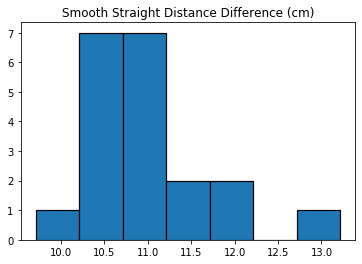

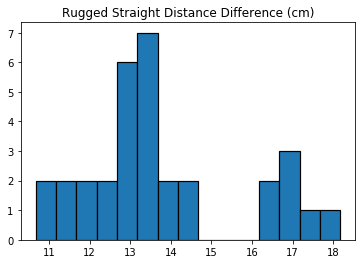

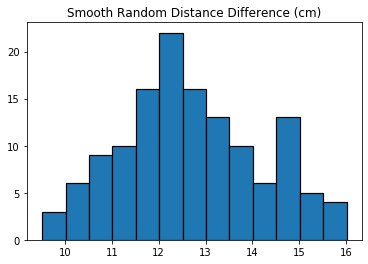

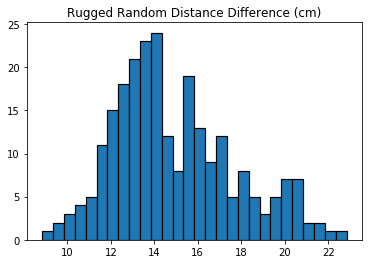

In [168]:
# Get all four datasets' distances
smooth_straight_dist = histogram("smooth_straight.csv", "Smooth Straight Distance Difference (cm)")
rugged_straight_dist = histogram("rugged_straight.csv", "Rugged Straight Distance Difference (cm)")
smooth_random_dist = histogram("smooth_random.csv", "Smooth Random Distance Difference (cm)")
rugged_random_dist = histogram("rugged_random.csv", "Rugged Random Distance Difference (cm)")

# Variance of the Difference of Euclidean Distance between the AprilTag & the Camera
### Data based on the histogram above
### The more the variance, the more the discrepancy exists between the position of AprilTag and the camera.

In [169]:
def variance_dist(file):
    csv_header = ["time", "tag_x", "tag_y", "tag_z", "pose_x", "pose_y", "pose_z"]
    df = pd.read_csv(file, header= None)
    df.columns = csv_header

    TAG = df[["tag_x","tag_y","tag_z"]]*100
    Pose = df[["pose_x","pose_y","pose_z"]]*100
    TAG.tag_x -= (0.125674 * 100)

    diff_x =  abs(TAG["tag_x"] - Pose["pose_x"])
    diff_y =  abs(TAG["tag_y"] - Pose["pose_y"])
    diff_z =  abs(TAG["tag_z"] - Pose["pose_z"])

    sq_sum = (diff_x) ** 2 + (diff_y) ** 2 + (diff_z) ** 2
    distance = np.sqrt(sq_sum)
    
    return np.var(distance)

In [172]:
# get all 4 datasets' variances
smooth_straight_var = variance_dist("smooth_straight.csv")
rugged_straight_var = variance_dist("rugged_straight.csv")
smooth_random_var = variance_dist("smooth_random.csv")
rugged_random_var = variance_dist("rugged_random.csv")

legend=["Smooth Straight", "Rugged Straight", "Smooth Random", "Rugged Random"]
fig = go.Figure()
fig.add_trace(go.Scatter(x=legend, 
                         y=[smooth_straight_var, rugged_straight_var, smooth_random_var, rugged_random_var],
                         mode='lines+markers'))
fig.update_layout(
    title="Variance of the Differences of Euclidean Distance",
    width=700,
    height=500,
    font=dict(
        family="Courier New, monospace",
        size=13,
))
fig.show()